# Table Detection

### Installing the Required Libraries

In [1]:
#! pip install transformers==4.22.2

In [2]:
# !rm -r transformers
# !git clone -b add_table_transformer https://github.com/nielsrogge/transformers.git
# !cd transformers
# !pip install -q ./transformers

In [3]:
#! pip install timm -U

In [4]:
#! pip install torch

### Importing the libraries

In [5]:
import cv2
import os
import numpy as np
import torch
import pandas as pd
#from huggingface_hub import hf_hub_download
from PIL import Image
from transformers import DetrFeatureExtractor, DetrForObjectDetection

In [6]:
os.listdir('C://Users//malvi//Desktop//Main//PhD//course_work//ML//Project//data//pubTable//PubTables-1M-Image_Table_Structure_PASCAL_VOC//PubTables1M-Structure-PASCAL-VOC//images')

['PMC1064074_table_0.jpg',
 'PMC1064076_table_0.jpg',
 'PMC1064076_table_1.jpg',
 'PMC1064076_table_2.jpg',
 'PMC1064076_table_3.jpg',
 'PMC1064078_table_0.jpg',
 'PMC1064078_table_2.jpg',
 'PMC1064078_table_3.jpg',
 'PMC1064078_table_4.jpg',
 'PMC1064078_table_5.jpg',
 'PMC1064078_table_6.jpg',
 'PMC1064080_table_0.jpg',
 'PMC1064081_table_0.jpg',
 'PMC1064081_table_1.jpg',
 'PMC1064081_table_2.jpg',
 'PMC1064082_table_0.jpg',
 'PMC1064082_table_1.jpg',
 'PMC1064084_table_0.jpg',
 'PMC1064094_table_0.jpg',
 'PMC1064094_table_1.jpg',
 'PMC1064094_table_2.jpg',
 'PMC1064095_table_0.jpg',
 'PMC1064095_table_1.jpg',
 'PMC1064095_table_2.jpg',
 'PMC1064095_table_3.jpg',
 'PMC1064097_table_0.jpg',
 'PMC1064097_table_1.jpg',
 'PMC1064097_table_2.jpg',
 'PMC1064097_table_3.jpg',
 'PMC1064098_table_0.jpg',
 'PMC1064098_table_1.jpg',
 'PMC1064098_table_2.jpg',
 'PMC1064098_table_3.jpg',
 'PMC1064099_table_0.jpg',
 'PMC1064100_table_0.jpg',
 'PMC1064100_table_1.jpg',
 'PMC1064100_table_2.jpg',
 

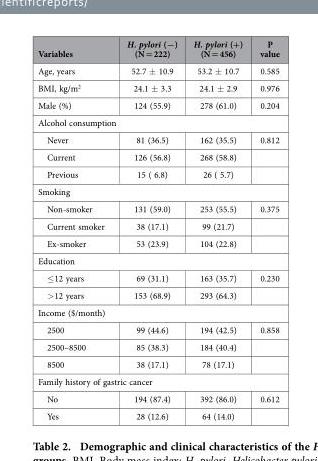

In [7]:
#file_path = hf_hub_download(repo_id="nielsr/example-pdf", repo_type="dataset", filename="example_pdf.png")
file_path = 'C://Users//malvi//Desktop//Main//PhD//course_work//ML//Project//data//pubTable//PubTables-1M-Image_Table_Structure_PASCAL_VOC//PubTables1M-Structure-PASCAL-VOC//images//PMC4476145_table_1.jpg'
image = Image.open(file_path).convert("RGB")
width, height = image.size
#image.resize((int(width*0.5), int(height*0.5)))
image.resize((int(width), int(height)))

In [8]:
print(image)

<PIL.Image.Image image mode=RGB size=318x461 at 0x20271151040>


In [9]:
res_img = np.array(image)
res_img

array([[[157, 166, 173],
        [124, 133, 140],
        [180, 189, 196],
        ...,
        [133, 142, 149],
        [133, 142, 149],
        [133, 142, 149]],

       [[130, 139, 146],
        [151, 160, 167],
        [212, 221, 228],
        ...,
        [133, 142, 149],
        [133, 142, 149],
        [133, 142, 149]],

       [[132, 142, 151],
        [113, 123, 132],
        [178, 188, 197],
        ...,
        [132, 142, 151],
        [132, 142, 151],
        [132, 142, 151]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [248, 248, 248],
        [255, 255, 255],
        [252, 252, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [165, 165, 165],
        [106, 106, 106],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 96,  96,  96],
        [175, 175, 175],
        [245, 245, 245]]

In [10]:
feature_extractor = DetrFeatureExtractor()
encoding = feature_extractor(image, return_tensors="pt")
encoding.keys()

dict_keys(['pixel_values', 'pixel_mask'])

In [11]:
print(encoding['pixel_values'].shape)

torch.Size([1, 3, 1159, 800])


In [12]:
from transformers import TableTransformerForObjectDetection

In [13]:
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

In [14]:
with torch.no_grad():
  outputs = model(**encoding)

In [15]:
import matplotlib.pyplot as plt

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(pil_img, scores, labels, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        text = f'{model.config.id2label[label]}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [16]:
# rescale bounding boxes
width, height = image.size
results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]

In [17]:
results

{'scores': tensor([0.9998]),
 'labels': tensor([0]),
 'boxes': tensor([[ 37.5861,  37.9576, 279.7928, 422.1335]])}

# Extracting text Using AWS Textract

In [20]:
table_boundRect = results['boxes']
table_boundRect

tensor([[ 37.5861,  37.9576, 279.7928, 422.1335]])

In [21]:
def getcrop(image, table_boundRect):
    #Get output of multiple Tables in an Image and save it to csv

    for i,(x,y,w,h) in enumerate(table_boundRect):
        image_crop = image[y:y+h,x:x+w]
        print(image_crop)
        plt.figure()
        plt.imshow(image_crop)
        #cv2.imwrite('img.jpg',image_crop)
        #plt.show()
        return image_crop

In [ ]:
test_image = getcrop(res_img, [(37, 38, 280, 422)])
test_image

[[[170 170 172]
  [171 171 173]
  [166 166 168]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[157 157 159]
  [167 167 169]
  [170 170 172]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[171 171 173]
  [169 169 171]
  [169 169 171]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[250 250 250]
  [255 255 255]
  [255 255 255]
  ...
  [253 253 253]
  [244 244 244]
  [ 15  15  15]]

 [[234 234 234]
  [255 255 255]
  [238 238 238]
  ...
  [251 251 251]
  [248 248 248]
  [255 255 255]]

 [[ 75  75  75]
  [159 159 159]
  [141 141 141]
  ...
  [202 202 202]
  [165 165 165]
  [106 106 106]]]


In [ ]:
with open('/home/ec2-user/SageMaker/output_data/image/img.jpg', "rb") as fh:
    buf = fh.read()

In [ ]:
import boto3
import io
from PIL import Image, ImageDraw
stream = io.BytesIO(buf)
image=Image.open(stream)

   
# Detect text in the document
client = boto3.client('textract')

#To process using image bytes:                      
image_binary = stream.getvalue()
response = client.detect_document_text(Document={'Bytes': image_binary})

In [ ]:
 #Get the text blocks
blocks=response['Blocks']
width, height =image.size    
print ('Detected Document Text')

# Create image showing bounding box/polygon the detected lines/text
for block in blocks:
        print('Type: ' + block['BlockType'])
        if block['BlockType'] != 'PAGE':
            print('Detected: ' + block['Text'])
            print('Confidence: ' + "{:.2f}".format(block['Confidence']) + "%")

        print('Id: {}'.format(block['Id']))
        if 'Relationships' in block:
            print('Relationships: {}'.format(block['Relationships']))
        print('Bounding Box: {}'.format(block['Geometry']['BoundingBox']))
        print('Polygon: {}'.format(block['Geometry']['Polygon']))
        print()
        draw=ImageDraw.Draw(image)
        # Draw WORD - Green -  start of word, red - end of word
        if block['BlockType'] == "WORD":
            draw.line([(width * block['Geometry']['Polygon'][0]['X'],
            height * block['Geometry']['Polygon'][0]['Y']),
            (width * block['Geometry']['Polygon'][3]['X'],
            height * block['Geometry']['Polygon'][3]['Y'])],fill='green',
            width=2)

            draw.line([(width * block['Geometry']['Polygon'][1]['X'],
            height * block['Geometry']['Polygon'][1]['Y']),
            (width * block['Geometry']['Polygon'][2]['X'],
            height * block['Geometry']['Polygon'][2]['Y'])],
            fill='red',
            width=2)    


        # Draw box around entire LINE  
        if block['BlockType'] == "LINE":
            points=[]

            for polygon in block['Geometry']['Polygon']:
                points.append((width * polygon['X'], height * polygon['Y']))

            draw.polygon((points), outline='black')    

# Display the image
image.show()

return len(blocks)

In [ ]:
import webbrowser, os
import json
import boto3
import io
from io import BytesIO
import sys
from pprint import pprint


def get_rows_columns_map(table_result, blocks_map):
    rows = {}
    for relationship in table_result['Relationships']:
        if relationship['Type'] == 'CHILD':
            for child_id in relationship['Ids']:
                cell = blocks_map[child_id]
                if cell['BlockType'] == 'CELL':
                    row_index = cell['RowIndex']
                    col_index = cell['ColumnIndex']
                    if row_index not in rows:
                        # create new row
                        rows[row_index] = {}
                        
                    # get the text value
                    rows[row_index][col_index] = get_text(cell, blocks_map)
    return rows


def get_text(result, blocks_map):
    text = ''
    if 'Relationships' in result:
        for relationship in result['Relationships']:
            if relationship['Type'] == 'CHILD':
                for child_id in relationship['Ids']:
                    word = blocks_map[child_id]
                    if word['BlockType'] == 'WORD':
                        text += word['Text'] + ' '
                    if word['BlockType'] == 'SELECTION_ELEMENT':
                        if word['SelectionStatus'] =='SELECTED':
                            text +=  'X '    
    return text


def get_table_csv_results(file_name):

    with open(file_name, 'rb') as file:
        img_test = file.read()
        bytes_test = bytearray(img_test)
        print('Image loaded', file_name)

    # process using image bytes
    # get the results
    client = boto3.client('textract')

    response = client.analyze_document(Document={'Bytes': bytes_test}, FeatureTypes=['TABLES'])

    # Get the text blocks
    blocks=response['Blocks']
    pprint(blocks)

    blocks_map = {}
    table_blocks = []
    for block in blocks:
        blocks_map[block['Id']] = block
        if block['BlockType'] == "TABLE":
            table_blocks.append(block)

    if len(table_blocks) <= 0:
        return "<b> NO Table FOUND </b>"

    csv = ''
    for index, table in enumerate(table_blocks):
        csv += generate_table_csv(table, blocks_map, index +1)
        csv += '\n\n'

    return csv

def generate_table_csv(table_result, blocks_map, table_index):
    rows = get_rows_columns_map(table_result, blocks_map)

    table_id = 'Table_' + str(table_index)
    
    # get cells.
    csv = 'Table: {0}\n\n'.format(table_id)

    for row_index, cols in rows.items():
        
        for col_index, text in cols.items():
            csv += '{}'.format(text) + ","
        csv += '\n'
        
    csv += '\n\n\n'
    return csv

def main(file_name):
    table_csv = get_table_csv_results(file_name)

    output_file = '/home/ec2-user/SageMaker/output_data/output.csv'

    # replace content
    with open(output_file, "wt") as fout:
        fout.write(table_csv)

    # show the results
    print('CSV OUTPUT FILE: ', output_file)


if __name__ == "__main__":
    file_name = '/home/ec2-user/SageMaker/output_data/image/img.jpg'
    main(file_name)

In [ ]:
df=pd.read_csv('/home/ec2-user/SageMaker/output_data/output.csv',error_bad_lines=False)
df=df.reset_index()
print(df)

# Table Structure Recognition

In [ ]:
#file_path = hf_hub_download(repo_id="nielsr/example-pdf", repo_type="dataset", filename="example_table.png")
file_path_2 = 'Data/PubTables1M-Structure-PASCAL-VOC/images/PMC4476145_table_1.jpg'
image_2 = Image.open(file_path_2).convert("RGB")
width_2, height_2 = image_2.size
#image.resize((int(width*0.5), int(height*0.5)))
image_2.resize((int(width_2), int(height_2)))

In [ ]:
encoding_2 = feature_extractor(image_2, return_tensors="pt")
encoding_2.keys()

In [ ]:
model_2 = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")

In [ ]:
with torch.no_grad():
  outputs_2 = model_2(**encoding_2)

In [ ]:
import matplotlib.pyplot as plt

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results_2(pil_img, scores, labels, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        text = f'{model_2.config.id2label[label]}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [ ]:
target_sizes_2 = [image_2.size[::-1]]
results_2 = feature_extractor.post_process_object_detection(outputs_2, threshold=0.6, target_sizes=target_sizes_2)[0]
plot_results_2(image_2, results_2['scores'], results_2['labels'], results_2['boxes'])

In [ ]:
results_2

In [ ]:
# Table Classes

model_2.config.id2label

In [ ]:
for score, label, box in zip(results_2["scores"], results_2["labels"], results_2["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model_2.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}")